# Imports

In [ ]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 986.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=259d79f28acada2c079da38701f78342a952cebc9b480d0deb57063c448866ec
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.0
    Uninstalling transformers-4.40.0:
      Successfully uninstalled transformers-4.40.0


In [ ]:
pip install -U sacremoses


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]=""

In [ ]:
import json
import yaml
import numpy as np
import pandas as pd
import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import statistics
import matplotlib.pyplot as plt
from collections import Counter
from torch import nn
import torch
from pathlib import Path
import re
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification, EarlyStoppingCallback
import evaluate

# Extraction

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
by_columns = False

In [ ]:
with open('tokens.yml', encoding="utf8") as f:
    tokens = yaml.safe_load(f)

In [ ]:
label_to_class = {key:value["start"] for key, value in tokens.items()}
class_to_label = {value["start"]:key for key, value in tokens.items()}
class_to_label

{'Ⓐ': 'age',
 'Ⓑ': 'birth_date',
 'Ⓒ': 'civil_status',
 'Ⓓ': 'education_level',
 'Ⓔ': 'employer',
 'Ⓕ': 'firstname',
 'Ⓗ': 'link',
 'Ⓘ': 'lob',
 'Ⓙ': 'maiden_name',
 'Ⓚ': 'nationality',
 'Ⓛ': 'observation',
 'Ⓜ': 'occupation',
 'Ⓞ': 'surname',
 'Ⓟ': 'surname_household'}

In [ ]:
len(class_to_label)

14

In [ ]:
def read_docs(file_path):
    ''' Open the json file and parse it to return tags and texts '''
    with open(file_path) as f:
        raw_docs = json.load(f)

    token_docs = []
    tag_docs = []
    for key, doc in tqdm.tqdm(raw_docs.items()):
        token_list = []
        tag_list = []
        if doc != "":
            for line in doc.split('\n'):
                formatted_line = re.split('\s?(Ⓐ|Ⓑ|Ⓒ|Ⓓ|Ⓔ|Ⓕ|Ⓗ|Ⓘ|Ⓙ|Ⓚ|Ⓛ|Ⓜ|Ⓞ|Ⓟ)', line)
                sentence, tags = formatted_line[2::2], formatted_line[1::2]
                if by_columns:
                    token_list.extend(sentence)
                    tags=[class_to_label[tag] for tag in tags]
                    tag_list.extend(tags)
                else:
                    for words, tag in zip(sentence, tags):
                        tokens = words.split(' ')
                        token_list.extend(tokens)
                        n = len(tokens)
                        tag=class_to_label[tag]
                        matching_tags = [str(tag)]*n
                        tag_list.extend(matching_tags)
                token_list.append(".")
                tag_list.append("O")
            token_docs.append(token_list)
            tag_docs.append(tag_list)

    return token_docs, tag_docs

texts, tags = read_docs('entities.json')

100%|██████████| 1218/1218 [00:00<00:00, 1714.74it/s]


In [ ]:
print(texts[0][0:50], tags[0][0:50], sep='\n')

['Breton', 'Cyrille', 'menuisier', '25', 'Garçon', 'française', '.', 'Ferazzi', 'Auguste', 'vitrier', '30', 'Garçon', 'Piémontaise', '.', 'Machol', 'Pierre', 'vitrier', '24', 'Garçon', 'Piémontaise', '.', 'Desbois', 'Alexandre', 'prop', 're', '48', 'Homme', 'marié', 'française', '.', 'Vignat', 'Zélie', 'prop', 're', 'sa', 'fe', '30', 'française', '.', 'Houy', 'Caroline', 'domestique', '24', 'Fille', 'française', '.', 'Violet', 'Esther', 'fe', 'de']
['surname', 'firstname', 'occupation', 'age', 'civil_status', 'nationality', 'O', 'surname_household', 'firstname', 'occupation', 'age', 'civil_status', 'nationality', 'O', 'surname_household', 'firstname', 'occupation', 'age', 'civil_status', 'nationality', 'O', 'surname_household', 'firstname', 'occupation', 'occupation', 'age', 'civil_status', 'civil_status', 'nationality', 'O', 'surname', 'firstname', 'occupation', 'occupation', 'link', 'link', 'age', 'nationality', 'O', 'surname', 'firstname', 'occupation', 'age', 'civil_status', 'natio

In [ ]:
# Number of docs
print("There are ", len(texts), " documents.")

There are  851  documents.


In [ ]:
# Average number of lines per doc
print("Average : ", statistics.mean([len(text) for text in texts]), " words by document")

238.24089306698002

In [ ]:
print("Minimum : ", min([len(text) for text in texts]), " words by document.")

7

In [ ]:
print("Maximum : ", max([len(text) for text in texts]), " words by document.")

400

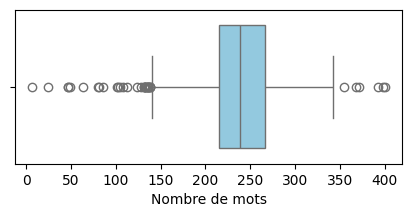

In [ ]:
plt.figure(figsize=(5, 2))

# Creating a boxplot using Seaborn
sns.boxplot(data=[len(text) for text in texts], orient='h', color='skyblue')

# Adding labels
plt.xlabel('Nombre de mots')

# Displaying the plot
plt.show()

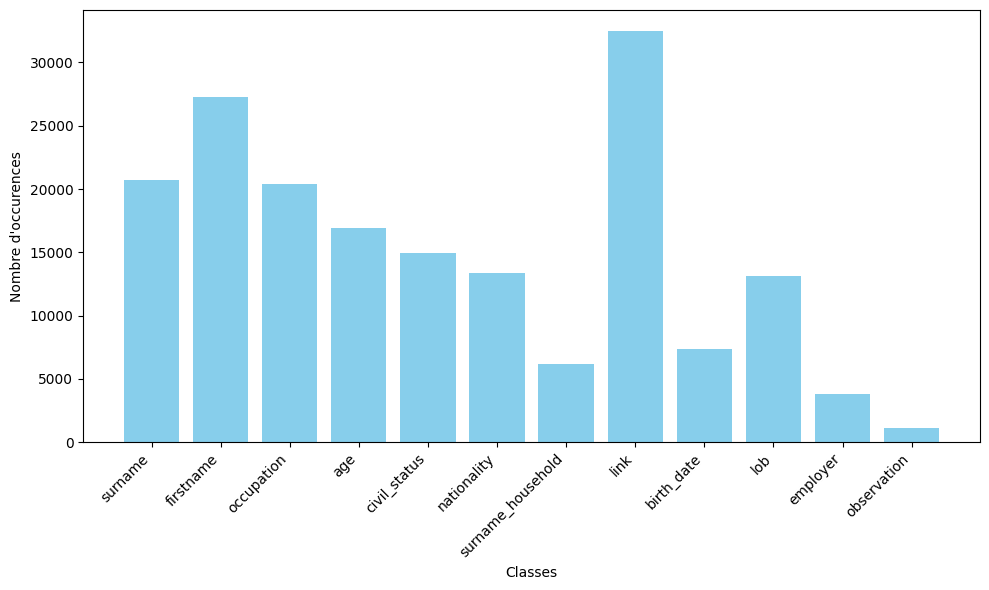

In [ ]:
flattened_labels = [elt for tag in tags for elt in tag if elt != "O"]

# Count the occurrences of each occupation
occupation_counts = Counter(flattened_labels)

# Separate the occupations and their corresponding counts
occupations = list(occupation_counts.keys())
counts = list(occupation_counts.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(occupations, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel("Nombre d'occurences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.3)
val_texts, test_texts, val_tags, test_tags = train_test_split(test_texts, test_tags, test_size=.5)

In [ ]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
nb = tag2id["O"]
for tag, id in tag2id.items():
    if id > nb:
        tag2id[tag] = id-1
tag2id["O"] = len(tag2id)-1
id2tag = {id: tag for tag, id in tag2id.items()}

In [ ]:
id2tag

{0: 'age',
 1: 'link',
 2: 'birth_date',
 3: 'lob',
 4: 'employer',
 5: 'civil_status',
 6: 'nationality',
 7: 'firstname',
 12: 'O',
 8: 'surname_household',
 9: 'observation',
 10: 'occupation',
 11: 'surname'}

In [ ]:
y = [tag2id[tag] for doc in tags for tag in doc]
class_weights=compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights=torch.tensor(class_weights,dtype=torch.float).to(device)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")

In [ ]:
def tokenize_and_align_labels(text, tags, truncation=True, padding=True):
    tokenized_inputs = tokenizer(text, truncation=truncation, is_split_into_words=True, padding=padding)

    labels = []
    for i, label in enumerate(tags):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(tag2id[label[word_idx]])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
encodings = tokenize_and_align_labels(texts, tags, truncation=False, padding=False)
# Average number of tokens per doc
print("Average : " statistics.mean([len(tokens) for tokens in encodings["input_ids"]]), " number of tokens")
max([len(tokens) for tokens in encodings["input_ids"]])

Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors


350.07873090481786


577

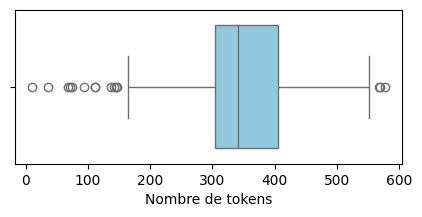

In [ ]:
plt.figure(figsize=(5, 2))

# Creating a boxplot using Seaborn
sns.boxplot(data=[len(tokens) for tokens in encodings["input_ids"]], orient='h', color='skyblue')

# Adding labels
plt.xlabel('Nombre de tokens')

# Displaying the plot
plt.show()

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings)

# Naive method

In [ ]:
def split(tag_docs):
    splitted_tags = []
    row_tags = []
    for tags in tag_docs:
        for tag in tags:
            if tag == "O":
                splitted_tags.append(row_tags)
                row_tags = []
            else:
                row_tags.append(tag2id[tag])
    return splitted_tags

In [ ]:
def most_probable_class(tags):
    splitted_tags = split(tags)
    max_length = max([len(tags) for tags in splitted_tags])
    most_probable_class_lst = np.zeros((max_length, len(unique_tags)-1))
    for tags in splitted_tags:
        for i, tag in enumerate(tags):
            most_probable_class_lst[i, tag] += 1
    most_probable_class_probabilities = most_probable_class_lst / most_probable_class_lst.sum(axis=1).reshape(-1, 1)
    return most_probable_class_probabilities
most_probable_class_probabilities = most_probable_class(train_tags)

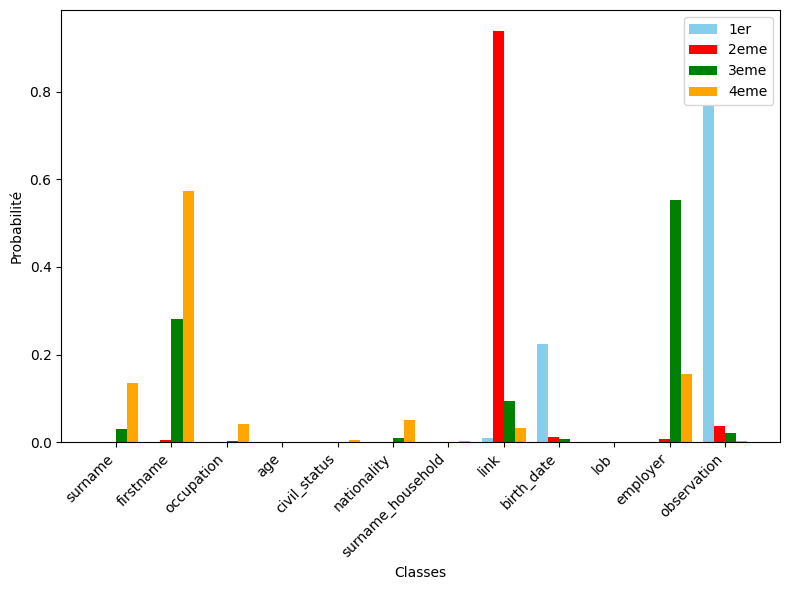

In [ ]:
plt.figure(figsize=(8, 6))

positions = np.arange(len(occupations))
bar_width = 0.2

plt.bar(positions - 1.5 * bar_width, most_probable_class_probabilities[0], bar_width, color='skyblue', label='1er')
plt.bar(positions - 0.5 * bar_width, most_probable_class_probabilities[1], bar_width, color='red', label='2eme')
plt.bar(positions + 0.5 * bar_width, most_probable_class_probabilities[2], bar_width, color='green', label='3eme')
plt.bar(positions + 1.5 * bar_width, most_probable_class_probabilities[3], bar_width, color='orange', label='4eme')

plt.xlabel('Classes')
plt.ylabel("Probabilité")
plt.xticks(positions, occupations, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

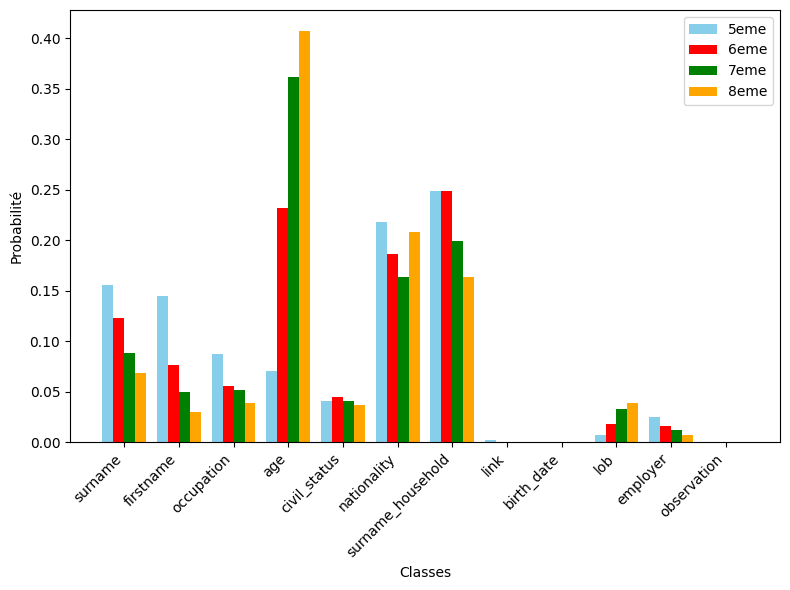

In [ ]:
plt.figure(figsize=(8, 6))

positions = np.arange(len(occupations))
bar_width = 0.2

plt.bar(positions - 1.5 * bar_width, most_probable_class_probabilities[5], bar_width, color='skyblue', label='5eme')
plt.bar(positions - 0.5 * bar_width, most_probable_class_probabilities[6], bar_width, color='red', label='6eme')
plt.bar(positions + 0.5 * bar_width, most_probable_class_probabilities[7], bar_width, color='green', label='7eme')
plt.bar(positions + 1.5 * bar_width, most_probable_class_probabilities[8], bar_width, color='orange', label='8eme')

plt.xlabel('Classes')
plt.ylabel("Probabilité")
plt.xticks(positions, occupations, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def naive_eval(tags, most_probable_class_probabilities):
    ''' Naive evaluation strategy using the distribution at the given place in the sentence '''
    splitted_tags = split(tags)
    n = len(unique_tags)-1
    pred_tags = []
    true_tags = []
    for tags in splitted_tags:
        length_sentence = len(tags)
        for i in range(len(tags)):
            pred_tags.append(id2tag[np.random.choice(n, p=most_probable_class_probabilities[i])])
            true_tags.append(id2tag[tags[i]])
        pred_tags.append("O")
        true_tags.append("O")
    return true_tags, pred_tags

true_tags, pred_tags = naive_eval(test_tags, most_probable_class_probabilities)

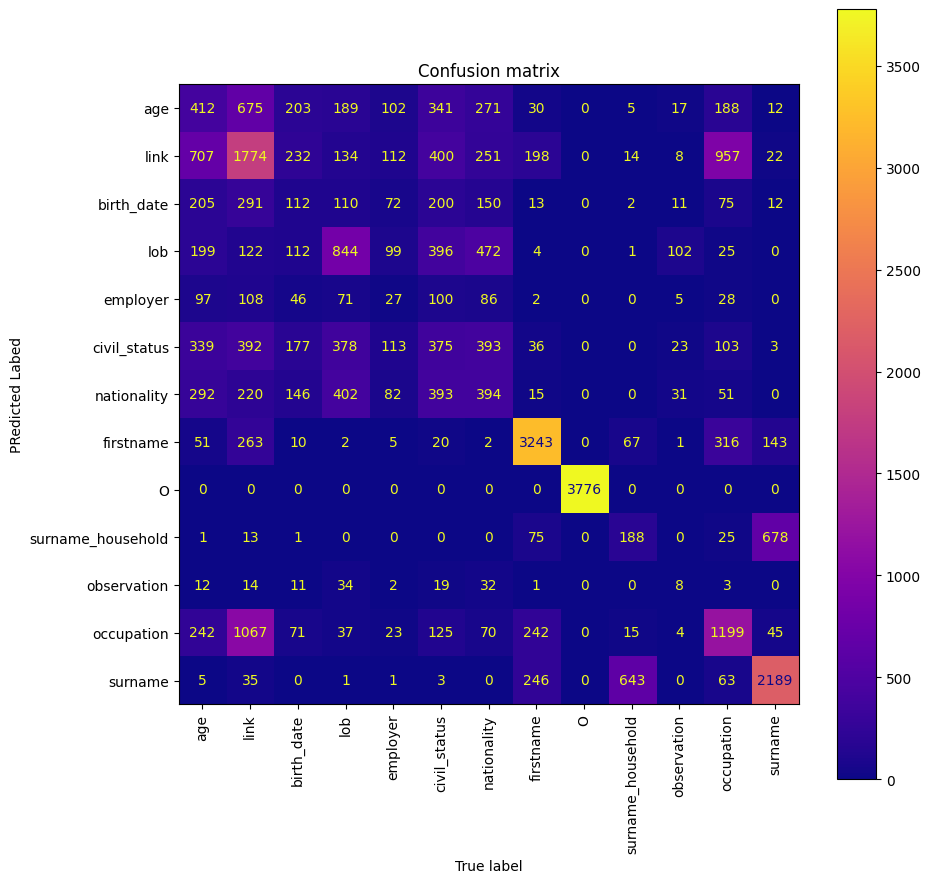

In [ ]:
labels_list = list(tag2id)
cm = confusion_matrix(true_tags, pred_tags, labels=labels_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation='vertical', cmap="plasma")
ax.set_xlabel('True label')
ax.set_ylabel('PRedicted Labed')

# Set title
plt.title("Confusion matrix")
plt.show()

In [ ]:
print(classification_report(true_tags, pred_tags, labels=labels_list))

                   precision    recall  f1-score   support

              age       0.16      0.17      0.16      2445
             link       0.36      0.37      0.36      4809
       birth_date       0.10      0.09      0.09      1253
              lob       0.38      0.36      0.37      2376
         employer       0.04      0.05      0.04       570
     civil_status       0.16      0.16      0.16      2332
      nationality       0.19      0.19      0.19      2026
        firstname       0.79      0.79      0.79      4123
                O       1.00      1.00      1.00      3776
surname_household       0.20      0.19      0.20       981
      observation       0.04      0.06      0.05       136
       occupation       0.40      0.38      0.39      3140
          surname       0.71      0.69      0.70      3186

         accuracy                           0.47     31153
        macro avg       0.35      0.35      0.35     31153
     weighted avg       0.47      0.47      0.47     3

# BERT Transformer

## Training

In [ ]:
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.2)
val_texts, test_texts, val_tags, test_tags = train_test_split(test_texts, test_tags, test_size=.5)

# model = "Jean-Baptiste/camembert-ner"
# model = "Davlan/distilbert-base-multilingual-cased-ner-hrl"
model = "Babelscape/wikineural-multilingual-ner"

tokenizer = AutoTokenizer.from_pretrained(model)

train_encodings = tokenize_and_align_labels(train_texts, train_tags)
val_encodings = tokenize_and_align_labels(val_texts, val_tags)
test_encodings = tokenize_and_align_labels(test_texts, test_tags)

train_dataset = Dataset(train_encodings)
val_dataset = Dataset(val_encodings)
test_dataset = Dataset(test_encodings)

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

model = AutoModelForTokenClassification.from_pretrained(
    model, num_labels=len(id2tag), id2label=id2tag, label2id=tag2id, ignore_mismatched_sizes=True
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at Babelscape/wikineural-multilingual-ner and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([9]) in the checkpoint and torch.Size([13]) in the model instantiated
- classifier.weight: found shape torch.Size([9, 768]) in the checkpoint and torch.Size([13, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class CustomTrainerForClassImbalance(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get('logits')
        # compute custom loss
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [ ]:
seqeval = evaluate.load("seqeval")

def compute_metrics(p, return_pred_labels=False):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [id2tag[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2tag[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    if return_pred_labels:
      return {
          "precision": results["overall_precision"],
          "recall": results["overall_recall"],
          "f1": results["overall_f1"],
          "accuracy": results["overall_accuracy"],
          "labels":true_labels,
          "predictions":true_predictions
      }
    else:
      return {
          "precision": results["overall_precision"],
          "recall": results["overall_recall"],
          "f1": results["overall_f1"],
          "accuracy": results["overall_accuracy"],
          }

In [ ]:
training_args = TrainingArguments(
    output_dir="model",
    learning_rate=5e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=100,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=5,
    metric_for_best_model="accuracy",
    load_best_model_at_end=True
    )

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
    )

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,2.198950,0.245098,0.139470,0.177778,0.332989
2,No log,1.932929,0.516768,0.472803,0.493809,0.622544
3,No log,1.675074,0.617560,0.578801,0.597552,0.685626
4,No log,1.444965,0.635542,0.588563,0.611151,0.683557
5,No log,1.242841,0.638484,0.610879,0.624376,0.713547
6,No log,1.066610,0.637640,0.633194,0.635409,0.721820
7,No log,0.936293,0.645746,0.645746,0.645746,0.726991
8,No log,0.821901,0.652720,0.652720,0.652720,0.753878
9,No log,0.730734,0.662857,0.647141,0.654905,0.766287
10,No log,0.662295,0.740000,0.722455,0.731122,0.816960


TrainOutput(global_step=19, training_loss=0.8477516174316406, metrics={'train_runtime': 435.505, 'train_samples_per_second': 0.918, 'train_steps_per_second': 0.23, 'total_flos': 19860528451584.0, 'train_loss': 0.8477516174316406, 'epoch': 19.0})

## Eval

In [ ]:
with torch.no_grad():
    for i, data in enumerate(test_dataset):
        inputs = data["input_ids"].unsqueeze(0).to(device)
        attention_masks = data["attention_mask"].unsqueeze(0).to(device)
        logits = model(inputs, attention_masks).logits.detach().cpu()
        if i == 0:
            predictions = logits
            labels = data["labels"].unsqueeze(dim=0)
        else:
            predictions = torch.concatenate((predictions, logits), dim=0)
            labels = torch.concatenate((labels, data["labels"].unsqueeze(dim=0)), dim=0)

    p = (np.array(predictions), np.array(labels))
    dic = compute_metrics(p, return_pred_labels=True)
    accuracy = dic["accuracy"]
    true_labels = dic["labels"]
    true_predictions = dic["predictions"]
print(accuracy)

0.8190114068441064


In [ ]:
def merge_tokens(true_predictions, true_labels):
    merged_true_predictions = []
    merged_true_labels = []
    old_elt = -1
    pred_list_possible = []
    for elt_preds, elt_labels in zip(true_predictions, true_labels):
        for elt_pred, elt_label in zip(elt_preds, elt_labels):
            if old_elt == -1:
                old_elt = elt_label
                pred_list_possible = [elt_pred]
            elif elt_label == old_elt:
                pred_list_possible.append(elt_pred)
            else:
                merged_true_labels.append(old_elt)
                old_elt = elt_label
                merged_true_predictions.append(max(pred_list_possible,key=pred_list_possible.count))
                pred_list_possible = [elt_pred]

    return merged_true_predictions, merged_true_labels

merged_true_predictions, merged_true_labels =  merge_tokens(true_predictions, true_labels)

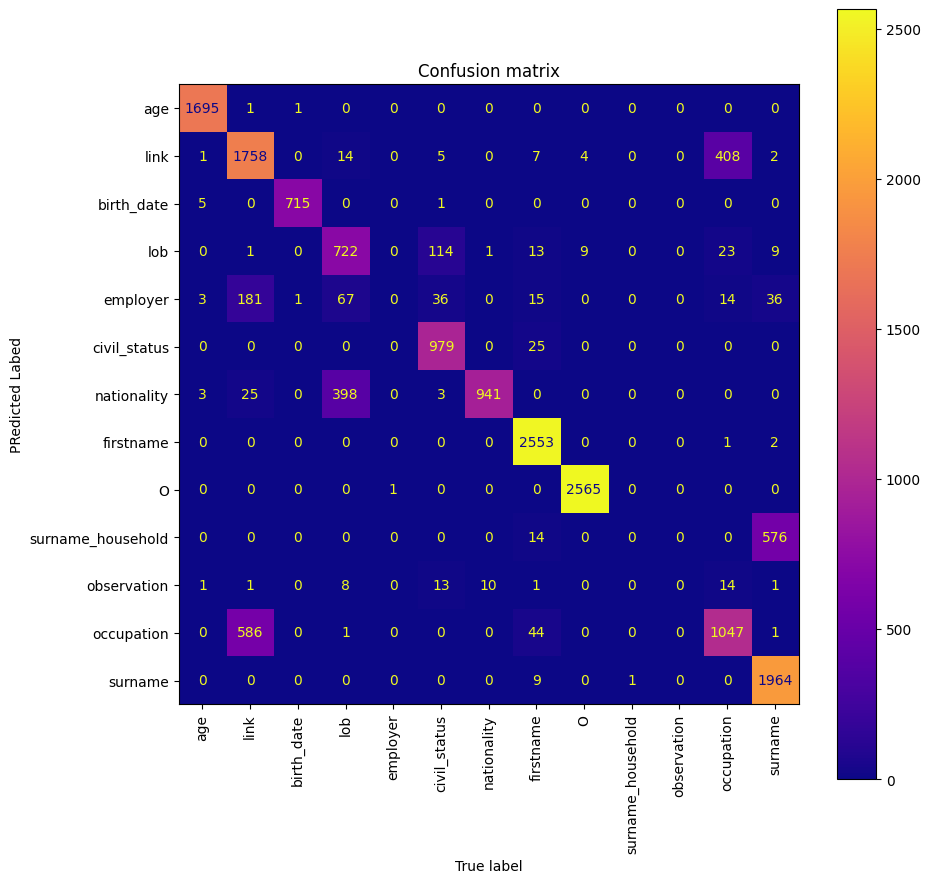

In [ ]:
labels_list = list(tag2id)
cm = confusion_matrix(merged_true_labels, merged_true_predictions, labels=labels_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation='vertical', cmap="plasma")
ax.set_xlabel('True label')
ax.set_ylabel('PRedicted Labed')

# Set title
plt.title("Confusion matrix")
plt.show()

In [ ]:
print(classification_report(merged_true_labels, merged_true_predictions, labels=labels_list))

                   precision    recall  f1-score   support

              age       0.99      1.00      1.00      1697
             link       0.69      0.80      0.74      2199
       birth_date       1.00      0.99      0.99       721
              lob       0.60      0.81      0.69       892
         employer       0.00      0.00      0.00       353
     civil_status       0.85      0.98      0.91      1004
      nationality       0.99      0.69      0.81      1370
        firstname       0.95      1.00      0.97      2556
                O       0.99      1.00      1.00      2566
surname_household       0.00      0.00      0.00       590
      observation       0.00      0.00      0.00        49
       occupation       0.69      0.62      0.66      1679
          surname       0.76      0.99      0.86      1974

         accuracy                           0.85     17650
        macro avg       0.65      0.68      0.66     17650
     weighted avg       0.81      0.85      0.82     1

In [ ]:
with torch.no_grad():
    data = test_dataset[0]
    inputs = data["input_ids"].unsqueeze(0).to(device)
    attention_masks = data["attention_mask"].unsqueeze(0).to(device)
    logits = model(inputs, attention_masks).logits.detach().cpu()
    labels = data["labels"].unsqueeze(dim=0)
    p = (np.array(logits), np.array(labels))
    dic = compute_metrics(p, return_pred_labels=True)
    accuracy = dic["accuracy"]
    true_labels = dic["labels"]
    true_predictions = dic["predictions"]

print(tokenizer.decode(inputs.to("cpu").tolist()[0], skip_special_tokens=True))
print(true_labels)
print(true_predictions)

Soubillon Raymond chef de ménage 56 Homme marié Bouzis. Dufour Jeanne idem sa femme 56 Femme mariée Danfan. Soubillon François instituteur leur fils 33 Veuf idem. Soubillon Berthe s.p fille du précédent 4 Fille Large Gagnac. Viratelle jean cordonnier chef de ménage 54 Veuf Daglan. Viratelle Martine s.p sa fille 20 Fille. Viratelle Elie s.p son fils 15 Garçon idem. Delalbre Guillaume facteur chef de ménage 39 Veuf Bonzic. Delalbre Marie s.p sa fille 9 Fille Daglan. Lamagat Jean menuisier chef de ménage 38 Homme marié idem. Borne Jeanne s.p sa femme 35 Femme mariée Domme. Lamagat Angèle idem leur fille 8 Fille Daglan. Lamagat Jean idem leur 1er fils 6 Garçon idem. Lamagat Eloi idem leur 2° fils 3 Garçon idem. Lamagat Robert idem leur 3° fils 1 Garçon idem. Lejourdan Catherine cultivatrice mère de la femme 66 Veuve Domme. Lespinasse Jean métayer chef de ménage 36 Homme marié Mabiat. Figié Antoinette idem sa femme 25 Femme mariée Villefranche. Lespinasse Marie s;p leur fille 5 Fille Salvia

In [ ]:
def mismatch(data, label_mismatched, nb_errors = 50):
    with torch.no_grad():
        nb_count_errors = 0
        for i, data in enumerate(test_dataset):
            data = test_dataset[i]
            inputs = data["input_ids"].unsqueeze(0).to(device)
            attention_masks = data["attention_mask"].unsqueeze(0).to(device)
            logits = model(inputs, attention_masks).logits.detach().cpu()
            labels = data["labels"].unsqueeze(dim=0)
            p = (np.array(logits), np.array(labels))
            dic = compute_metrics(p, return_pred_labels=True)
            accuracy = dic["accuracy"]
            true_labels = dic["labels"]
            true_predictions = dic["predictions"]

            count_O = 0
            merged_true_predictions, merged_true_labels =  merge_tokens(true_predictions, true_labels)
            for true_label, true_prediction in zip(merged_true_predictions, merged_true_labels):

                if true_label == "O":
                    count_O += 1
                else:
                    if true_label != true_prediction and (true_label == label_mismatched or true_prediction == label_mismatched):
                        nb_count_errors += 1
                        print(nb_count_errors)
                        print(true_label)
                        print(true_prediction)
                        print(tokenizer.decode(inputs.to("cpu").tolist()[0], skip_special_tokens=True).split('.')[count_O])
                        print(" ")
            if nb_count_errors > nb_errors:
                break

In [ ]:
i=3
print(labels_list[i])
mismatch(test_dataset, labels_list[i])

observation
1
lob
observation
 Pironon Jean Baptiste néant fils 1923 française St Flour
 
2
civil_status
observation
 Pradier Sicaire cultiv 38 Garçon dit Voailles
 
3
lob
observation
 Philippe Léa idem pupille 1899 française assistance publique
 
4
link
observation
 Charpentier Marie cultivatrice veuve
 
5
civil_status
observation
 Martin Jean cult chef de ménage 48 Garçon célibatire
 
6
civil_status
observation
 Raymond Marie sans profession 67 Fille célibataire
 
7
civil_status
observation
 Biscuit Jean cultivateur chef de ménage 76 Veuf veuf ADAM
 
8
civil_status
observation
Arveuf Marie sa femme 47 Femme mariée Veuve Travignon
 
9
civil_status
observation
 Espéron Jacques sans profession 40 Homme marié indigent secouru par la charite
 
10
link
observation
 Junet Annette sa femme 41 Femme mariée idem
 
11
link
observation
 Espéron Marie leur fille 20 Fille idem
 
12
civil_status
observation
 Espéron Jean leur fils 10 Garçon idem - idiot
 
13
civil_status
observation
 Jury Louise sa